In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sample_image = np.array([
    [1, 2, 3, 0, 0],
    [4, 5, 6, 0, 0],
    [7, 8, 9, 0, 0],
    [0, 0, 0, 1, 2],
    [0, 0, 0, 3, 4]
], dtype=np.float32)

Sample Image:


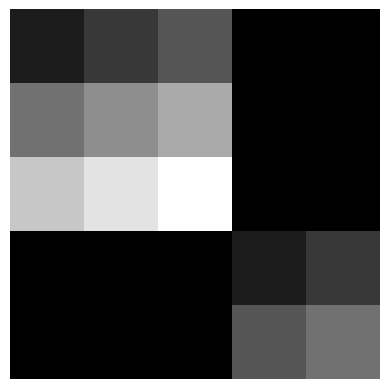

In [4]:
print("Sample Image:")
plt.imshow(sample_image, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
sample_image = sample_image.reshape((1, 5, 5, 1))  # Reshape to (1, height, width, channels)
print(sample_image[0, :, :, 0])

[[1. 2. 3. 0. 0.]
 [4. 5. 6. 0. 0.]
 [7. 8. 9. 0. 0.]
 [0. 0. 0. 1. 2.]
 [0. 0. 0. 3. 4.]]


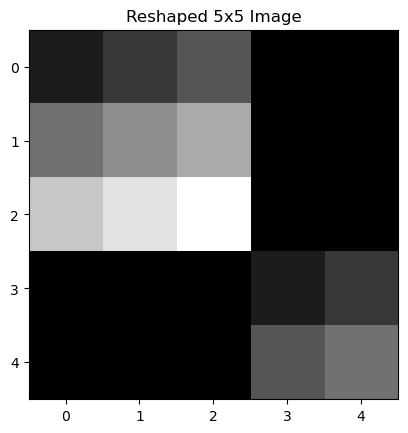

In [10]:
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.title("Reshaped 5x5 Image")
plt.show()

In [11]:
conv_layer = tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='valid',
    activation='relu',
    kernel_initializer=tf.constant_initializer([[1, 0, -1],
                                                [1, 0, -1],
                                                [1, 0, -1]]),
    bias_initializer='zeros'
)

In [12]:

output = conv_layer(sample_image)

output_image = output.numpy().squeeze()

print("Output after convolution:")
print(output_image)

Output after convolution:
[[ 0. 15. 18.]
 [ 0. 12. 13.]
 [ 0.  4.  3.]]


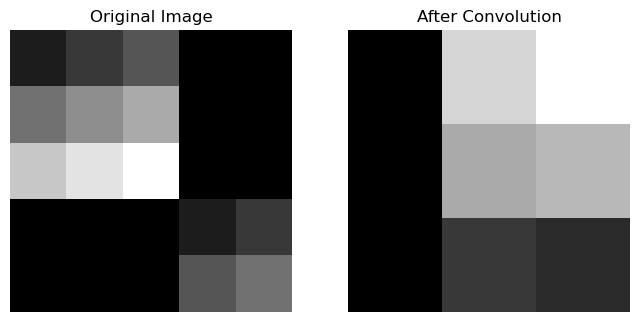

In [13]:
# Create a figure with 1 row and 2 columns for side-by-side comparison of images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Display the Original Image
axs[0].imshow(sample_image.squeeze(), cmap='gray')  # Show the original image in grayscale
axs[0].set_title('Original Image')  # Set title for the original image
axs[0].axis('off')  # Hide axes for a cleaner look

# Display the Feature Map (Output Image after Convolution)
axs[1].imshow(output_image, cmap='gray')  # Show the result of convolution in grayscale
axs[1].set_title('After Convolution')  # Set title for the convolution result
axs[1].axis('off')  # Hide axes for a cleaner look

# Show the complete visualization with both images side by side
plt.show()